2023-04-01 20:56:08.050302: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 20:56:08.131754: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 20:56:08.132399: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 20:56:09.315356: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/maddin/Dokumente/Uni/master/ecqr/data_loaders.py:58: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date_list = pd.date_range(start='01/01/2017', 

26280


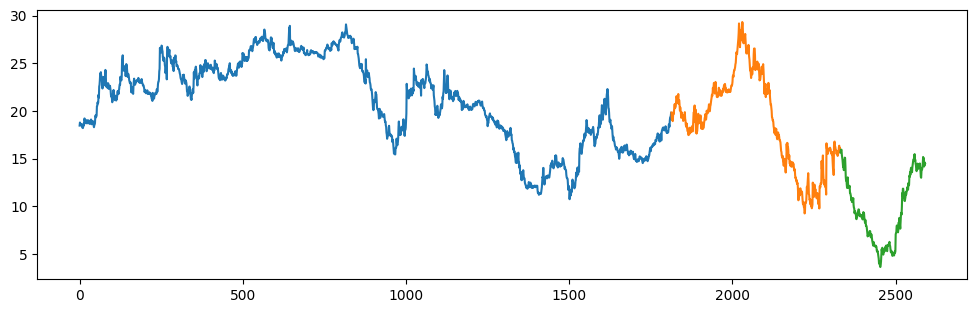

In [1]:
import data_loaders
import utils
import data_preprocessing
import numpy as np
from cp_single import CQR
data_loaders.get_solar_data()
train_df, val_df, test_df = data_loaders.get_gas_data([0.7,0.2],0.9,"old")
utils.plot_ts([train_df, val_df, test_df])
#print(test_df.shape)
B = 1                      # number of ensembles
alpha = 0.05                # confidence level            
quantiles = [alpha/2,       # quantiles to predict
             0.5,
             1-(alpha/2)] 

# rf hyperparams
n_trees = 20                # number of trees in each rf model

# lstm tcn only
regression = 'quantile'     # options: {'quantile', 'linear'}. If 'linear', just set one quantile
l2_lambda = 1e-4            # weight of l2 regularization in the lstm and tcn models
batch_size = 32             # size of batches using to train the lstm and tcn models

# lstm hyperparams
units = 64           # number of units in each lstm layer
n_layers = 2              # number of lstm layers in the model

# units = 64
# n_layers = 1


# tcn hyperparams
dilations = [1,2]#,4,8]       # dilation rate of the Conv1D layers
n_filters = 128             # filters in each Conv1D layer 
kernel_size = 7             # kernel size in each ConvID layer

learning_rate = 1e-4
time_steps_in = 6


P = {'B':B, 'alpha':alpha, 'quantiles':quantiles,
                            'n_trees':n_trees,  
                            'regression':regression,'l2':l2_lambda, 'batch_size':batch_size,
                            'units':units,'n_layers':n_layers,
                            'dilations':dilations, 'n_filters':n_filters, 'kernel_size':kernel_size,
                            'learning_rate' : learning_rate, 'time_steps_in' : time_steps_in}
P['model_type'] = 'lstm'



In [2]:
train_data, val_x, val_y, test_x, test_y, Scaler = data_preprocessing.data_windowing(df=train_df, 
                                                                                    val_data=val_df,
                                                                                    test_data=test_df,
                                                                                    B=1, 
                                                                                    time_steps_in=6, 
                                                                                    time_steps_out=1, 
                                                                                    label_columns=['Price'])
P['n_vars'] = test_x.shape[2] 
P['time_steps_out'] = test_y.shape[1]

print(test_x.shape)



(153, 6, 1)


In [4]:
CQR(train_data,val_x,val_y,test_x, test_y, P)

2023-04-01 09:15:18.066840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-01 09:15:18.068335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-01 09:15:18.070661: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

66/68 [============================>.] - ETA: 0s - loss: 0.0604 - pi_cov: 0.8139 - pi_len: 10.1295

2023-04-01 09:15:22.765450: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [537,1]
	 [[{{node Placeholder/_1}}]]
2023-04-01 09:15:22.960054: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-01 09:15:22.961507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'g

68/68 [==============================] - 5s 25ms/step - loss: 0.0605 - pi_cov: 0.8194 - pi_len: 9.9294 - val_loss: 0.0570 - val_pi_cov: 0.7059 - val_pi_len: 1.9464


2023-04-01 09:15:23.716855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2162,6,1]
	 [[{{node Placeholder/_0}}]]
